In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
# spliting target variables
target = data['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

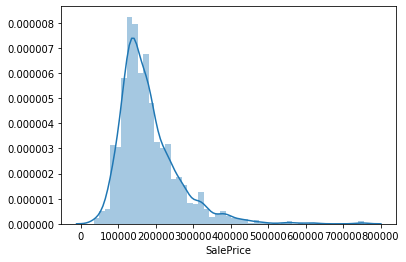

In [4]:
# visualizing the distribution of salesprice(Dependent) variable
import seaborn as sns
sns.distplot(target,hist=True)

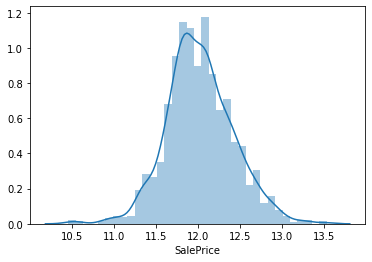

In [5]:
# log transformation
target_log = np.log(target)
sns.distplot(target_log,hist=True)

# Feature Engineering

In [6]:
myFeatures = data[['BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']]
myFeatures.head()

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,150,856,856,854
1,284,1262,1262,0
2,434,920,920,866
3,540,756,961,756
4,490,1145,1145,1053


In [7]:
# BsmtUnfSF is covered in TotalBsmtSF, so drop it
#myFeatures = myFeatures.drop(['TotalBsmtSF'], axis = 1)
#myFeatures.head()

In [8]:
raw_features = myFeatures
data_num = myFeatures
data_num['SalePrice'] = target
myFeatures = myFeatures[~(myFeatures == 0).any(axis=1)]
myFeatures.head()

C:\Users\gmnya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,150,856,856,854,208500
2,434,920,920,866,223500
3,540,756,961,756,140000
4,490,1145,1145,1053,250000
5,64,796,796,566,143000


In [9]:
myFeatures.isnull().sum().sum()

0

C:\Users\gmnya\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gmnya\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


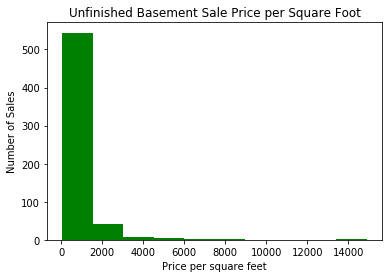

In [10]:
# SalePrice per Square Foot
SalePriceSF = data['SalePrice']/myFeatures['BsmtUnfSF']
plt.hist(SalePriceSF, color="green")
plt.title("Unfinished Basement Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

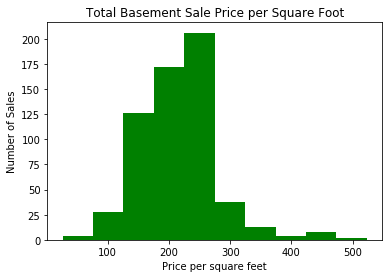

In [11]:
# SalePrice per Square Foot
SalePriceSF = data['SalePrice']/myFeatures['TotalBsmtSF']
plt.hist(SalePriceSF, color="green")
plt.title("Total Basement Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

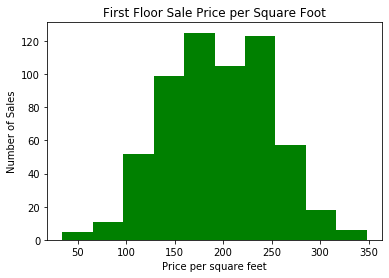

In [12]:
# SalePrice per Square Foot
SalePriceSF = data['SalePrice']/myFeatures['1stFlrSF']
plt.hist(SalePriceSF, color="green")
plt.title("First Floor Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

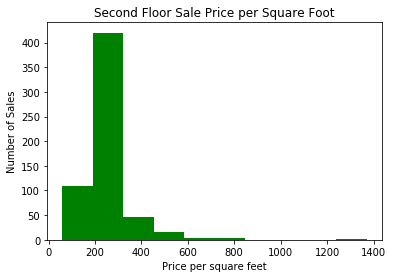

In [13]:
# SalePrice per Square Foot
SalePriceSF = data['SalePrice']/myFeatures['2ndFlrSF']
plt.hist(SalePriceSF, color="green")
plt.title("Second Floor Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

# Reduce Skewness for Numerical Featurees

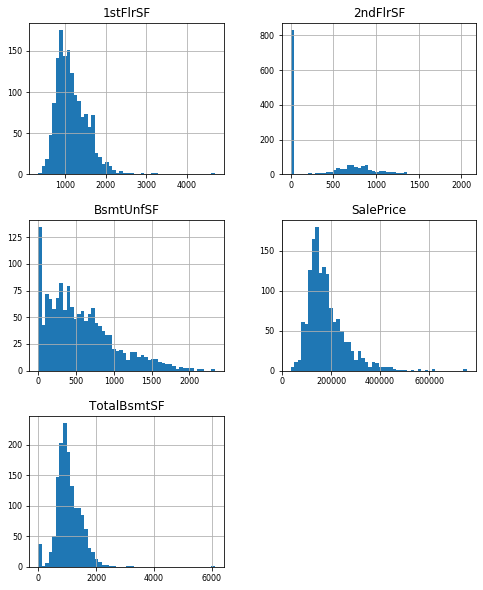

In [14]:
data_num.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [15]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

C:\Users\gmnya\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


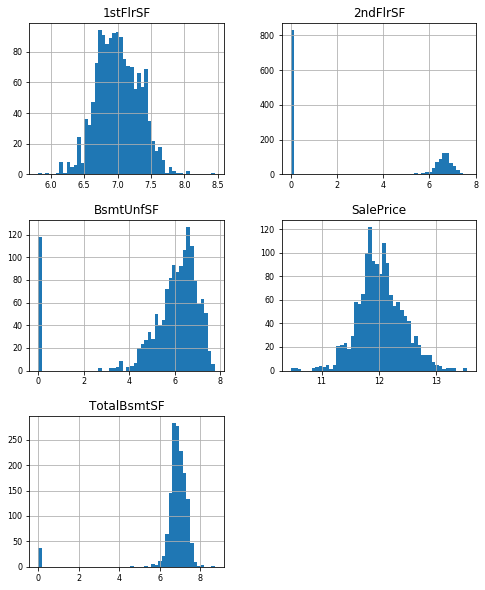

In [16]:
data_num.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

# Mean Normalization

In [17]:
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,5.977049e-16,-5.958181e-16,-3.868029e-15,1.682064e-16,1.104111e-14
std,2.390241e-01,1.314215e-01,1.202529e-01,4.314361e-01,1.299359e-01
min,-7.282006e-01,-7.743381e-01,-4.524466e-01,-3.752715e-01,-5.086802e-01
25%,-3.051994e-02,-8.031694e-03,-8.528529e-02,-3.752715e-01,-8.098109e-02
50%,6.733259e-02,1.716789e-02,-6.196352e-03,-3.752715e-01,-7.333860e-03
75%,1.350357e-01,4.806033e-02,8.721603e-02,4.882625e-01,8.121732e-02
max,2.717994e-01,2.256619e-01,5.475534e-01,6.247285e-01,4.913198e-01


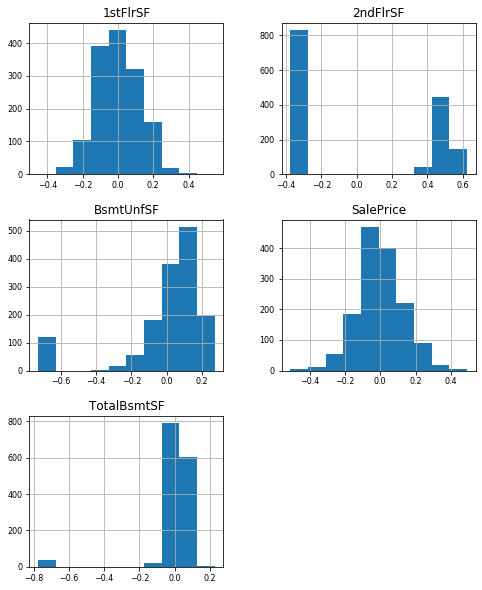

In [18]:
data_num.hist(figsize=(8, 10),xlabelsize=8, ylabelsize=8);

# Correlation

In [19]:
# Check Correlation

data_num.corr()

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
BsmtUnfSF,1.000000,0.524372,0.150662,0.091389,0.208233
TotalBsmtSF,0.524372,1.000000,0.288227,-0.058313,0.372838
1stFlrSF,0.150662,0.288227,1.000000,-0.349622,0.608955
2ndFlrSF,0.091389,-0.058313,-0.349622,1.000000,0.180778
SalePrice,0.208233,0.372838,0.608955,0.180778,1.000000


Text(0.5, 1, 'Correlation between features')

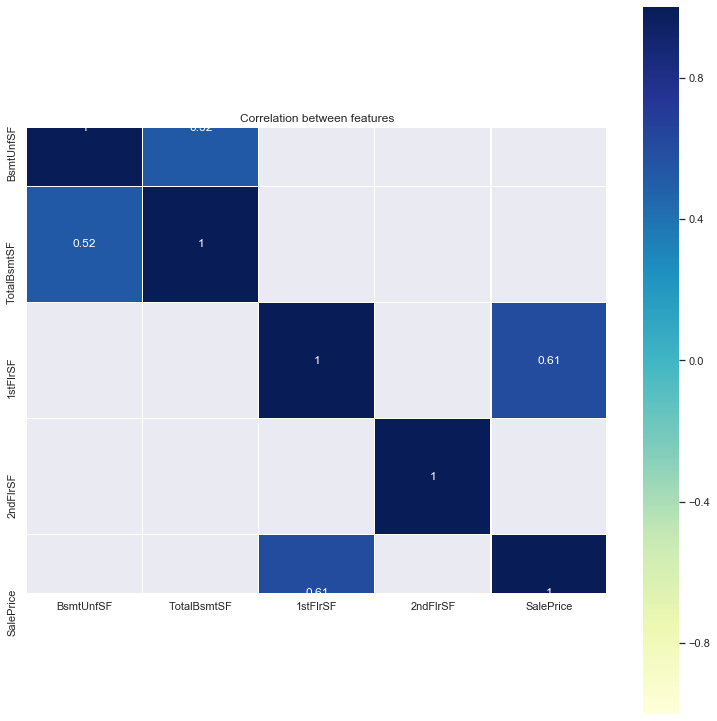

In [85]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=data_num.corr()
plt.figure(figsize=(13, 13))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1, vmin=-1, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);
plt.title('Correlation between features')